<a href="https://colab.research.google.com/github/aszxcnm22/Web-app-Bladder-Cancer-Classification/blob/main/YOLO_%E0%B8%95%E0%B9%89%E0%B8%99%E0%B9%81%E0%B8%9A%E0%B8%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# === STEP 0: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

# === STEP 1: ติดตั้ง YOLOv8
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.1 MB/s eta 0:00:00


In [4]:
# === STEP 2: แตกไฟล์จาก Roboflow (YOLOv8 Segmentation Format)
!unzip -q /content/drive/MyDrive/Center.v1i.yolov11.zip -d /content/

In [5]:
# train_yolov8_bladder.py

from ultralytics import YOLO
import yaml
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
from ultralytics import YOLO

# === โหลดโมเดล YOLOv8 แบบ segmentation ===
model = YOLO('yolov8n-seg.pt')  # ใช้ pre-trained model

# === เทรนโมเดล
results = model.train(
    data='/content/data.yaml',
    epochs=3,
    imgsz=640,
    batch=16,
    name='bladder_seg_v8nano'
)



Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bladder_seg_v8nano2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 

train: Scanning /content/train/labels... 77 images, 8 backgrounds, 0 corrupt: 100%|██████████| 77/77 [00:00<00:00, 651.48it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 614.9±156.4 MB/s, size: 46.7 KB)


val: Scanning /content/valid/labels... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 1802.99it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/segment/bladder_seg_v8nano2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/bladder_seg_v8nano2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.743      4.611      4.219        1.8         28        640: 100%|██████████| 5/5 [01:51<00:00, 22.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.30s/it]

                   all         20         24    0.00267      0.667      0.032     0.0197    0.00217      0.542     0.0168     0.0121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.487       3.22      4.077      1.577         19        640: 100%|██████████| 5/5 [01:38<00:00, 19.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.37s/it]

                   all         20         24      0.003       0.75     0.0661      0.035    0.00267      0.667     0.0318     0.0162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.547      2.782      3.782      1.467         19        640: 100%|██████████| 5/5 [01:30<00:00, 18.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.45s/it]

                   all         20         24      0.003       0.75      0.179     0.0756    0.00317      0.792      0.137     0.0634



3 epochs completed in 0.093 hours.
Optimizer stripped from runs/segment/bladder_seg_v8nano2/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/bladder_seg_v8nano2/weights/best.pt, 6.8MB

Validating runs/segment/bladder_seg_v8nano2/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.42s/it]


                   all         20         24      0.003       0.75      0.177     0.0749    0.00317      0.792      0.135     0.0625
Speed: 2.6ms preprocess, 344.0ms inference, 0.0ms loss, 99.3ms postprocess per image
Results saved to runs/segment/bladder_seg_v8nano2
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1730.7±449.7 MB/s, size: 51.2 KB)


val: Scanning /content/valid/labels.cache... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:07<00:07,  7.81s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.11s/it]


                   all         20         24      0.003       0.75      0.177     0.0749    0.00317      0.792      0.135     0.0625
Speed: 1.9ms preprocess, 407.2ms inference, 0.0ms loss, 78.9ms postprocess per image
Results saved to runs/segment/bladder_seg_v8nano22
📊 Validation Metrics:
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b8f88bcf590>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,   

In [8]:
# === ประเมินความแม่นยำ (validation)
metrics = model.val()
print("📊 Validation Metrics:")
print(metrics)


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 762.4±172.8 MB/s, size: 47.0 KB)


val: Scanning /content/valid/labels.cache... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:08<00:08,  8.01s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.19s/it]


                   all         20         24      0.003       0.75      0.177     0.0749    0.00317      0.792      0.135     0.0625
Speed: 4.1ms preprocess, 388.6ms inference, 0.0ms loss, 87.4ms postprocess per image
Results saved to runs/segment/bladder_seg_v8nano23
📊 Validation Metrics:
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b8f88c2a350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,   

In [ ]:
# === STEP 5: ประเมินผล
metrics = model.val()
print("Validation Metrics:", metrics)

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1041.2±239.9 MB/s, size: 48.0 KB)


val: Scanning /content/CenterDataset/valid/labels.cache... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:06<00:06,  6.46s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.20s/it]


                   all         20         24    0.00317      0.792      0.384      0.222    0.00283      0.708       0.33      0.169
Speed: 1.9ms preprocess, 322.6ms inference, 0.0ms loss, 56.5ms postprocess per image
Results saved to runs/segment/bladder_seg_v8nano42
Validation Metrics: ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c3915a52f50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     

In [ ]:
# === STEP 6: ทดสอบ Segmentation บนภาพ MRI ใหม่
result = model.predict(
    source='/content/drive/MyDrive/All Center/muscle invasive bladder/muscle_0_1 0.png',
    conf=0.25,
    save=True
)
print("Segmentation Prediction Complete.")


image 1/1 /content/drive/MyDrive/All Center/muscle invasive bladder/muscle_0_1 0.png: 640x640 (no detections), 257.9ms
Speed: 4.0ms preprocess, 257.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/bladder_seg_v8nano43
Segmentation Prediction Complete.


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# === กำหนด path
image_dir = '/content/CenterDataset/train/images'
label_dir = '/content/CenterDataset/train/labels'
save_dir = '/content/segmentation_output'

os.makedirs(save_dir, exist_ok=True)

# === เลือกภาพตัวอย่าง
sample_image = os.listdir(image_dir)[0]  # เปลี่ยน index เพื่อดูภาพอื่น
image_path = os.path.join(image_dir, sample_image)
label_path = os.path.join(label_dir, sample_image.replace('.jpg', '.txt').replace('.png', '.txt'))

# === โหลดภาพ
image = cv2.imread(image_path)
h, w, _ = image.shape
mask = np.zeros((h, w), dtype=np.uint8)

# === อ่าน label และสร้าง binary mask (1 คือ วัตถุ)
with open(label_path, 'r') as f:
    for line in f:
        parts = line.strip().split()
        points = np.array(parts[1:], dtype=np.float32).reshape(-1, 2)
        points[:, 0] *= w
        points[:, 1] *= h
        points = points.astype(np.int32)
        cv2.fillPoly(mask, [points], color=255)

# === ทำ mask แบบ 3 ช่อง (RGB)
mask_rgb = cv2.merge([mask, mask, mask])

# === แทนพื้นหลังเป็นสีดำ
foreground = cv2.bitwise_and(image, mask_rgb)

# === บันทึก
base_name = os.path.splitext(sample_image)[0]
save_path = f"{save_dir}/{base_name}_nobg.jpg"
cv2.imwrite(save_path, foreground)

print(f"Saved foreground image without background at: {save_path}")


Saved foreground image without background at: /content/segmentation_output/muscle_0_1-108_png.rf.34f65da4eb8725773bdc0ffe8f226626_nobg.jpg


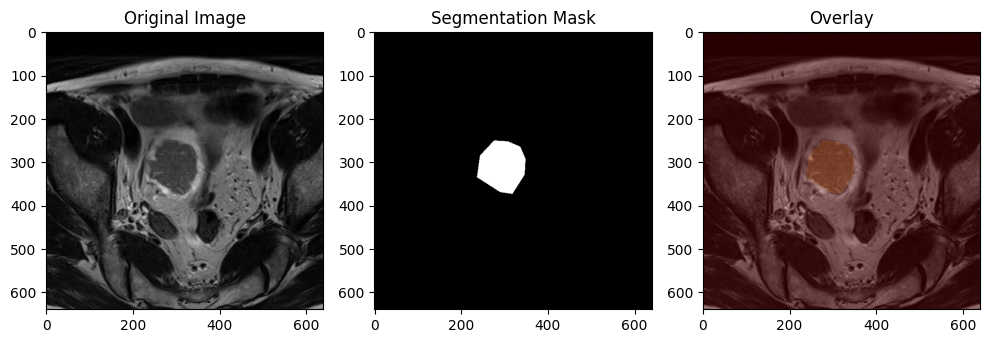

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# === เปลี่ยน path ตามโฟลเดอร์ของคุณ ===
image_dir = '/content/CenterDataset/train/images'
label_dir = '/content/CenterDataset/train/labels'

# === เลือกไฟล์ภาพตัวอย่าง ===
sample_image = os.listdir(image_dir)[0]
image_path = os.path.join(image_dir, sample_image)

# === โหลดภาพ ===
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# === โหลด label ที่เกี่ยวข้อง (YOLOv8 Segmentation format) ===
label_path = os.path.join(label_dir, sample_image.replace('.jpg', '.txt').replace('.png', '.txt'))

h, w, _ = image.shape
mask = np.zeros((h, w), dtype=np.uint8)

with open(label_path, 'r') as f:
    for line in f:
        parts = line.strip().split()
        cls = int(parts[0])
        points = np.array(parts[1:], dtype=np.float32).reshape(-1, 2)
        # แปลงจาก normalized เป็นพิกัดจริง
        points[:, 0] *= w
        points[:, 1] *= h
        points = points.astype(np.int32)
        cv2.fillPoly(mask, [points], color=cls+1)  # บวก 1 เพื่อไม่ให้เป็นสีดำ (0)

# === สร้างภาพ overlay
colored_mask = cv2.applyColorMap((mask * 50).astype(np.uint8), cv2.COLORMAP_JET)
overlay = cv2.addWeighted(image, 0.7, colored_mask, 0.3, 0)

# === แสดงผล
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(mask, cmap='gray')
plt.title("Segmentation Mask")

plt.subplot(1,3,3)
plt.imshow(overlay)
plt.title("Overlay")

plt.tight_layout()
plt.show()
